### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

### Business Goal :

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying 
customers. 

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead 
score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading Dataset

leadinfo = pd.read_csv('Leads.csv')

In [4]:
leadinfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leadinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leadinfo.shape

(9240, 37)

In [7]:
leadinfo.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
#Check for Null Values

leadinfo.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

## Step 2: Data Cleaning

In [11]:
# check for percentage of null values in each column

percent_missing = round(100*(leadinfo.isnull().sum()/len(leadinfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

There are some columns that have more than 25% null values.

In [12]:
# Check if there are any duplicate values in the dataset

leadinfo[leadinfo.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There are no duplicate values in the data.

In [13]:
# There are few columns which have a value called "Select". 
# We need to convert those values as NaN, since the customer has not selected any value at the time of entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

leadinfo['Specialization'] = leadinfo['Specialization'].replace('Select', np.NaN)
leadinfo['How did you hear about X Education'] = leadinfo['How did you hear about X Education'].replace('Select', np.NaN)
leadinfo['Lead Profile'] = leadinfo['Lead Profile'].replace('Select', np.NaN)
leadinfo['City'] = leadinfo['City'].replace('Select', np.NaN)

In [14]:
leadinfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
# check for percentage of null values in each column

missing_percentage = round(100*(leadinfo.isnull().sum()/len(leadinfo.index)),2)

print(missing_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
# Let us dopr the columns which have more than 30% null values : (10 columns)

# 1) Specialization (36.58)
# 2) How did you hear about X Education (78.46)
# 3) Tags (36.29)
# 4) Lead Quality (51.59)
# 5) Lead Profile (74.19)
# 6) City (39.71)
# 7) Asymmetrique Activity Index (45.65)
# 8) Asymmetrique Profile Index (45.65)
# 9) Asymmetrique Activity Score (45.65)
# 10) Asymmetrique Profile Score (45.65)

leadinfo = leadinfo.drop(['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile',
                          'City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score'
                         ,'Asymmetrique Profile Score'], axis=1)

In [17]:
leadinfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [18]:
leadinfo.shape

(9240, 27)

In [19]:
# check for percentage of null values in each column after dropping columns having more than 30% null values

missing_percentage = round(100*(leadinfo.isnull().sum()/len(leadinfo.index)),2)
print(missing_percentage)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

###### Following columns have null values :
1- Country
2- Lead Source
3- Total Visits
4- Page Views Per Visit
5- Last Activity    
6- What is your current occupation
7- What matters most to you in choosing a course
    
Let us see and decide whather we need to impute values in the above column or drop the columns.

In [20]:
# Lets check the value counts for each values in the "Country" column:

leadinfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [21]:
# check the percentage of "India" as value in the "Country" column:

Country_percentage = round(100*(len(leadinfo[leadinfo['Country']=='India'])/len(leadinfo['Country'])),2)

print(Country_percentage)

70.26


In [22]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leadinfo = leadinfo.drop(['Country'], axis = 1)

In [23]:
leadinfo.shape

(9240, 26)

In [24]:
# Lets check the value counts for each values in the "Lead Source" column:

leadinfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.

leadinfo['Lead Source'] = leadinfo['Lead Source'].replace('google', 'Google')

In [26]:
leadinfo['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
# Now we can see that all are the unique values.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leadinfo['Lead Source'] = leadinfo['Lead Source'].replace(np.NaN, 'Google')

In [28]:
# Lets check the value counts for each values in the "Total Visits" column:

leadinfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [29]:
# Now let us check the median for "TotalVisits" column:

leadinfo['TotalVisits'].median()

3.0

In [30]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leadinfo['TotalVisits'] = leadinfo['TotalVisits'].replace(np.NaN, leadinfo['TotalVisits'].median())

In [31]:
# Lets check the value counts for each values in the "Page Views Per Visit" column:

leadinfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [32]:
# Now let us check the median for "Page Views Per Visit" column:

leadinfo['Page Views Per Visit'].median()

2.0

In [33]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

leadinfo['Page Views Per Visit'] = leadinfo['Page Views Per Visit'].replace(np.NaN, leadinfo['Page Views Per Visit'].median())

In [34]:
# Lets check the value counts for each values in the "Last Activity" column:

leadinfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
# Since we do not have any information about what actually is the last activity of the customer, so we can add a new category 
# named 'Not Sure' for the null values

leadinfo['Last Activity'] = leadinfo['Last Activity'].replace(np.NaN, 'Not Sure')

In [36]:
# Lets check the value counts for each values in the "What is your current occupation" column:

leadinfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
# Since there is no information has been provided for the Current Occupation feild, so we can add a new category called 
# 'No Info' and replace it with the null values in the column:

leadinfo['What is your current occupation'] = leadinfo['What is your current occupation'].replace(np.NaN, 'No Info')

In [38]:
# Lets check the value counts for each values in the "What matters most to you in choosing a course" column:

leadinfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
matters_most_percentage = round(100*len(leadinfo[leadinfo['What matters most to you in choosing a course']
                                                 =='Better Career Prospects'])/
                                len(leadinfo['What matters most to you in choosing a course']),2)

print(matters_most_percentage)

70.65


In [40]:
# Since "Better Career Prospects" occurs around 70% of times in the "What matters most to you in choosing a course" column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leadinfo = leadinfo.drop(['What matters most to you in choosing a course'], axis=1)

In [41]:
leadinfo.shape

(9240, 25)

In [42]:
# Now check for percentage of null values in each column:

missing_percentage = round(100*(leadinfo.isnull().sum()/len(leadinfo.index)), 2)
print(missing_percentage)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [43]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leadinfo = leadinfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis = 1)

In [44]:
leadinfo.shape

(9240, 20)

### Outlier Treatment

In [46]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadinfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


From the above table we can see that outliers are present in "TotalVisits" and "Page Views Per Visit" columns

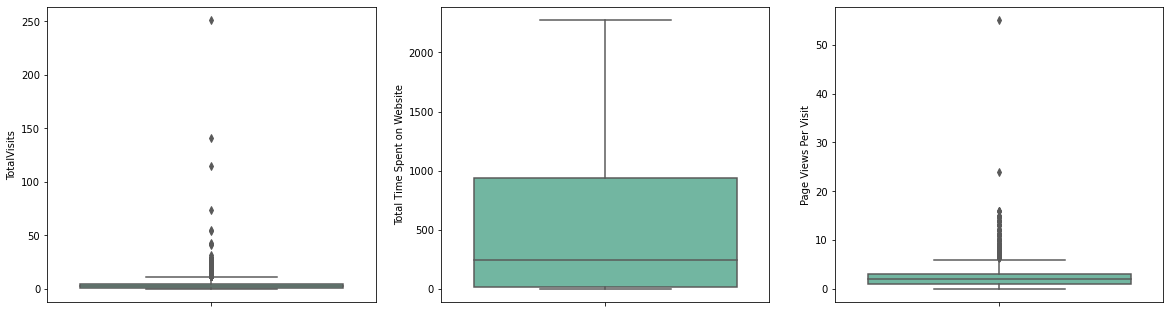

In [47]:
# Check the outliers in all the numeric columns:

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = leadinfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set2', data = leadinfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = leadinfo)
plt.show()

In [48]:
# Removing values beyond 99% for "Total Visits"

nn_quartile_total_visits = leadinfo['TotalVisits'].quantile(0.99)
leadinfo = leadinfo[leadinfo["TotalVisits"] < nn_quartile_total_visits]
leadinfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

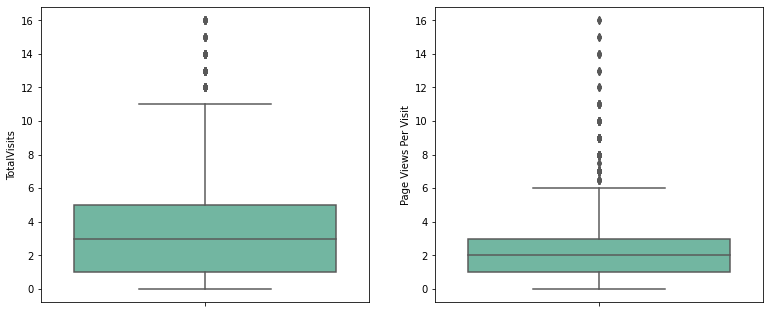

In [49]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = leadinfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = leadinfo)
plt.show()

In [50]:
# Removing values beyond 99% for "Page Views Per Visit"

nn_quartile_page_visits = leadinfo['Page Views Per Visit'].quantile(0.99)
leadinfo = leadinfo[leadinfo["Page Views Per Visit"] < nn_quartile_page_visits]
leadinfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

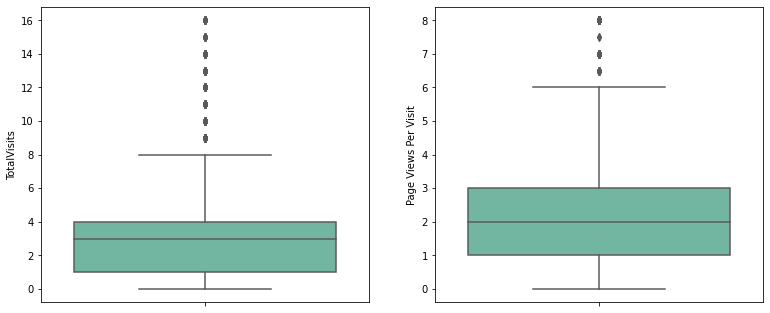

In [51]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set2', data = leadinfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Page Views Per Visit', palette='Set2', data = leadinfo)
plt.show()

In [52]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadinfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [53]:
leadinfo.shape

(9029, 20)

In [54]:
# Determine the percentage of data retained

num_data = round(100*(len(leadinfo)/9240),2)
print(num_data)

97.72


At this point, the data has been cleaned and around 98% of data has been retained

### Step 3: Data Analysis
Let us try and understand the data now based on each columns effect on the conversion rates

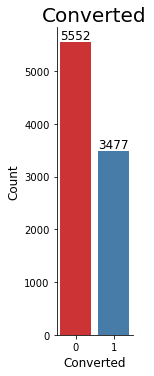

In [55]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leadinfo, palette="Set1", aspect= 0.4);

plt.title('Converted', fontsize = 20)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for i in ax.patches:        
    ax.text(i.get_x() + i.get_width()/2., i.get_height(), i.get_height(), fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

From the above graph we can see that out of 9029 leads, 3477 got converted which shows a current conversion rate of approax 39%.

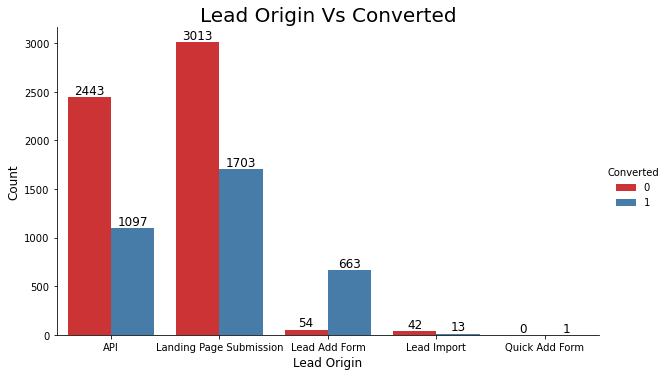

In [56]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 20)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for i in ax.patches:
    
    if np.isnan(i.get_height()):
        height = 0
    else:
        height = i.get_height()
    
    height = int(height)
    ax.text(i.get_x()+i.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

From the above graph we can say that the origin for maximum conversions has been witnessed from "landing Page Submission".

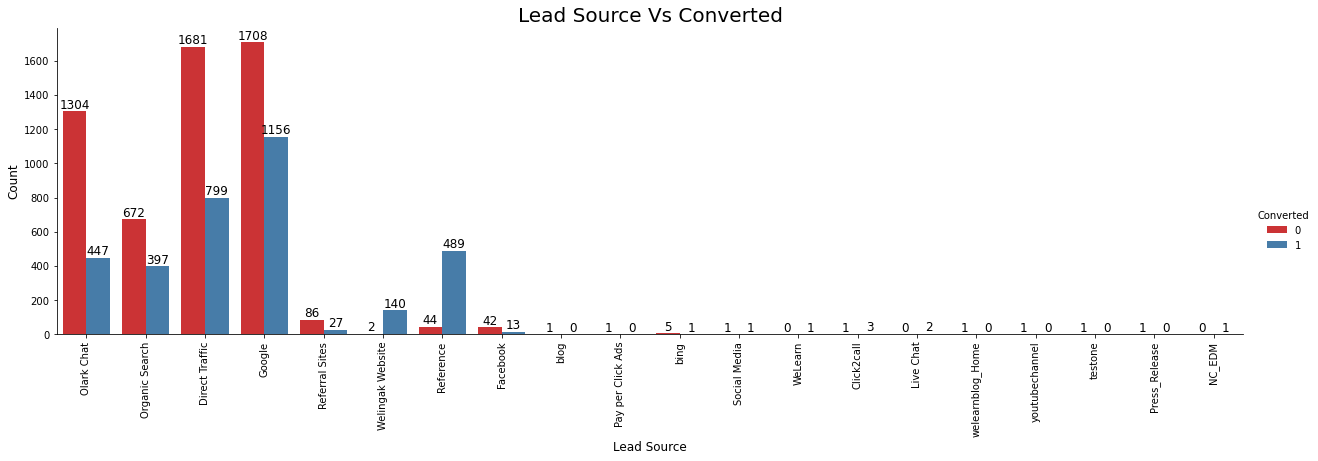

In [57]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 20)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
   
plt.show()

From the above graph, we can see that major conversion's lead source is google.

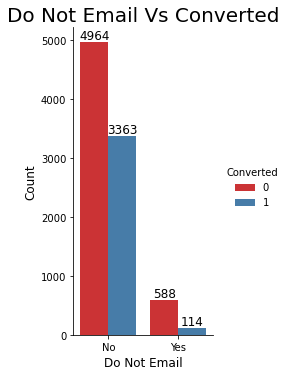

In [58]:
# Do not Email

plot = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.6);

plt.title('Do Not Email Vs Converted', fontsize = 20)
plt.xlabel("Do Not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

From the above graph it can be seen that the conversion rate is higher where email has been sent.

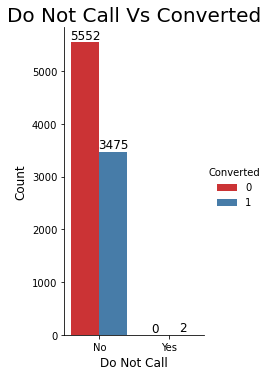

In [59]:
# Do not Call

plot = sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.6);

plt.title('Do Not Call Vs Converted', fontsize = 20)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.
However, it can also be seen that 2 leads opted for "Do Not Call", but they still got converted.

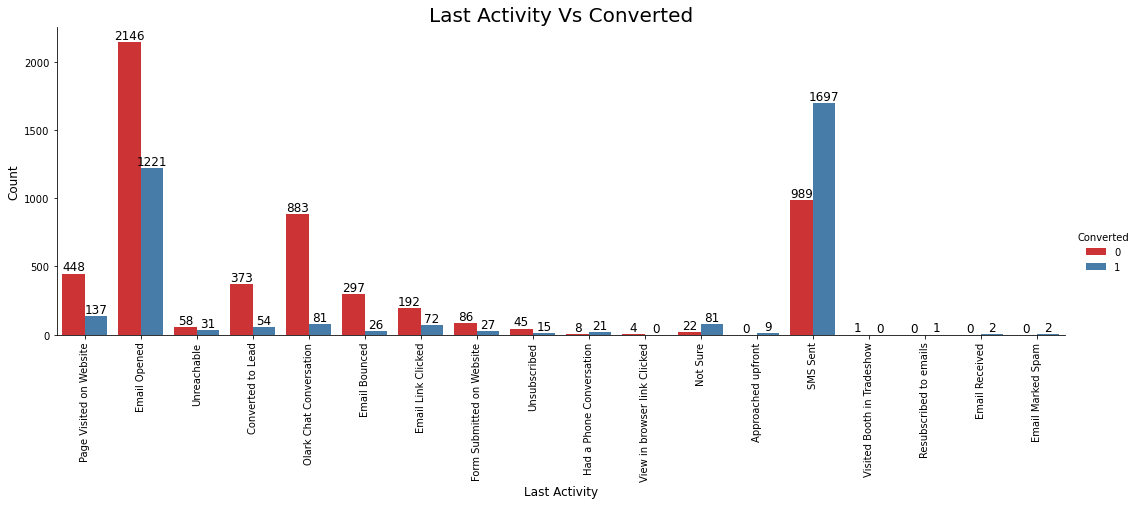

In [60]:
# Last Activity

plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 3.0);

plt.title('Last Activity Vs Converted', fontsize = 20)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

As per the above graph, last activity value of 'SMS Sent' had more conversion followed by Email Opened.

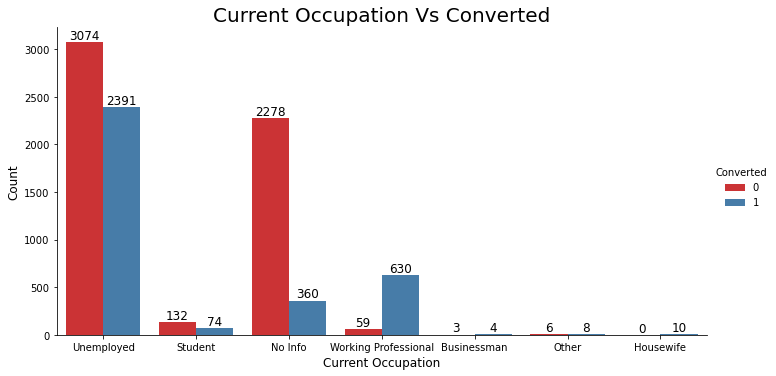

In [61]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadinfo, palette="Set1", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 20)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that 
    - Out of 7 business men, 4 got converted
    - Out 10 housewives, all 10 leads got converted.

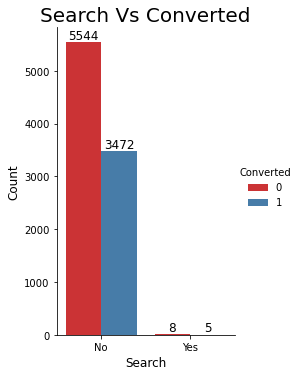

In [62]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 20)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who are not through search

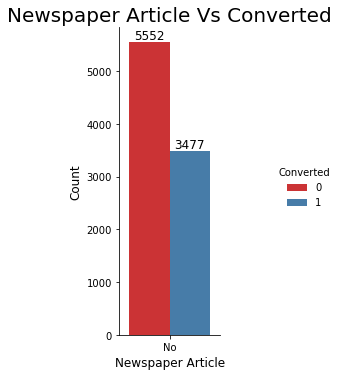

In [63]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 20)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , so we can consider for dropping this column.

In [64]:
# Dropping Newspaper Article

leadinfo = leadinfo.drop(['Newspaper Article'], axis=1)

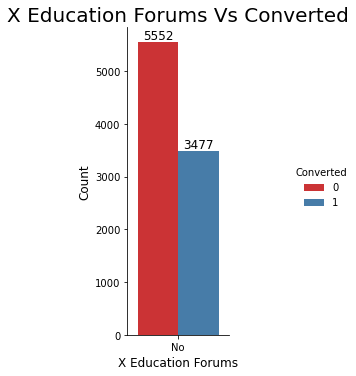

In [65]:
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 20)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , so we can consider for dropping this column.

In [66]:
# Dropping X Education Forum column

leadinfo = leadinfo.drop(['X Education Forums'], axis=1)

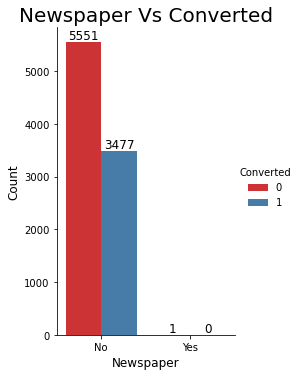

In [67]:
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 20)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [68]:
# Dropping Newspaper column

leadinfo = leadinfo.drop(['Newspaper'], axis=1)

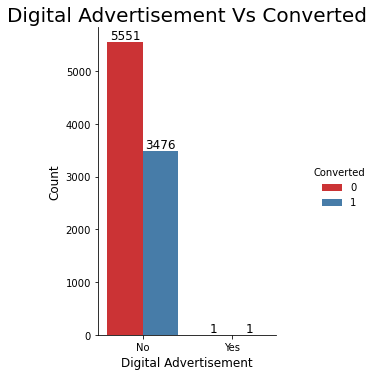

In [69]:
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 20)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

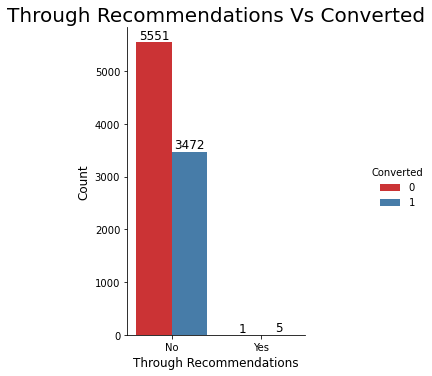

In [70]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 20)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

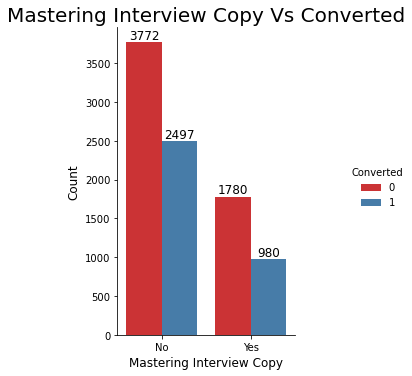

In [71]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadinfo, palette="Set1",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 20)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

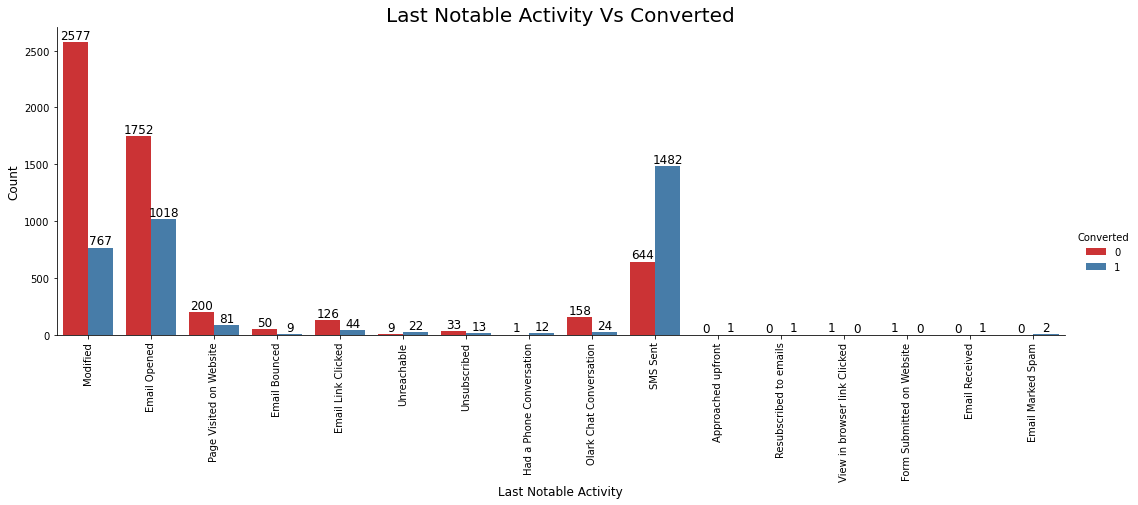

In [72]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadinfo, palette="Set1", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 20)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

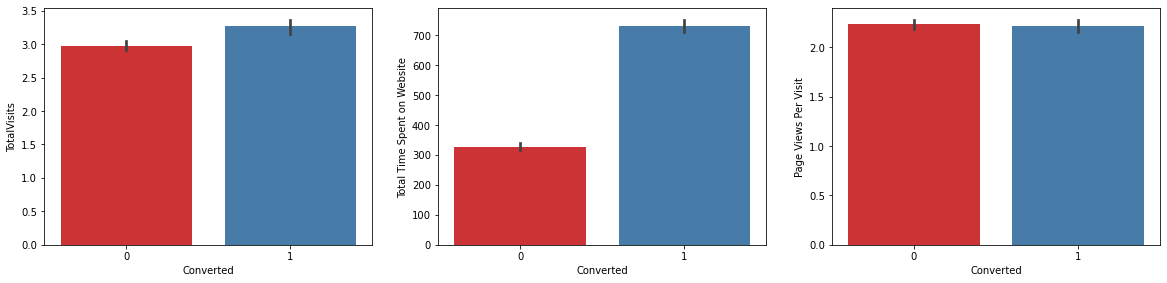

In [73]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set1', data = leadinfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set1', data = leadinfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set1', data = leadinfo)
plt.show()

## Step 4: Data Preparation - Creating Dummies

Converting some binary variables (Yes/No) to 0/1

In [74]:
Varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadinfo[Varlist] = leadinfo[Varlist].apply(binary_map)

In [75]:
leadinfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified


In [76]:
leadinfo.shape

(9029, 17)

In [77]:
# Creating dummies for the following columns below

# Lead Origin
# Lead Source
# last Activity
# What is your current occupation
# Last Notable Activity



In [78]:
# Adding the dummy variables to the original dataframe:

leadinfo_1 = pd.concat([leadinfo,leadorigin, leadsource, lastactivity, currentoccupation,lastnotableactivity], axis=1)

In [79]:
leadinfo_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,1,0,0,0,0,0,0,0


In [80]:
# Remove following columns from the dataframe:

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

leadinfo_1 = leadinfo_1.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [81]:
leadinfo_1.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
leadinfo_1.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

### Step 5: Preparing the data for model training: Test-Train Split

In [83]:
# Preparing the variables for model building 

X = leadinfo_1.drop(["Converted"],axis=1)
y=leadinfo_1["Converted"]

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [85]:
#checking the variables

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,3.0,1993,3.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
113,0,0,5.0,1566,5.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4132,0,0,6.0,1703,6.0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
5573,0,0,2.0,64,2.0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,1.0,20,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Step 6: Rescaling the features with MinMax Scaling

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,...,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Resubscribed to emails,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
### Checking the Conversion Rate percentage

converted = (sum(leadinfo_1['Converted'])/len(leadinfo_1['Converted'].index))*100
converted

38.50924797873519

At this point of time we have 39% conversion rate which we need to improve to around 80% as per problem statement.

### Step 7: Feature Selection Using RFE

In [88]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 15 variables as output

rfe=RFE(logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)
rfe.support_

array([ True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [89]:
cols_to_keep=X_train.columns[rfe.support_]

In [90]:
cols_to_keep

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Email Bounced',
       'LastActivity_Not Sure', 'LastActivity_Olark Chat Conversation',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Info',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_SMS Sent', 'LastNotableActivity_Unreachable'],
      dtype='object')

In [91]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])


In [92]:
X_train=X_train[cols_to_keep]
X_test=X_test[cols_to_keep]

In [93]:
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,CurrentOccupation_Housewife,CurrentOccupation_No Info,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable
2240,0,0.1875,0.898963,0,0,0,0,0,0,0,1,0,0,0,0
113,0,0.3125,0.706360,0,0,0,0,0,0,0,0,0,0,0,0
4132,0,0.3750,0.768155,0,0,0,0,0,0,0,0,0,0,0,0
5573,0,0.1250,0.028868,0,0,0,0,0,0,0,0,0,0,0,0
1109,0,0.0625,0.009021,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,0,0.3125,0.111412,0,0,0,0,0,0,0,0,0,0,1,0
5292,0,0.0000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0
5496,0,0.1250,0.065404,0,0,0,0,0,0,0,0,0,0,0,0
885,1,0.5000,0.039693,0,0,0,1,0,0,0,1,0,0,0,0


## First model

In [94]:
import statsmodels.api as sm

In [95]:
X_train_sm=sm.add_constant(X_train,has_constant="add")
X_test_sm=sm.add_constant(X_test,has_constant="add")

In [96]:
X_train_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,CurrentOccupation_Housewife,CurrentOccupation_No Info,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable
2240,1.0,0,0.1875,0.898963,0,0,0,0,0,0,0,1,0,0,0,0
113,1.0,0,0.3125,0.706360,0,0,0,0,0,0,0,0,0,0,0,0
4132,1.0,0,0.3750,0.768155,0,0,0,0,0,0,0,0,0,0,0,0
5573,1.0,0,0.1250,0.028868,0,0,0,0,0,0,0,0,0,0,0,0
1109,1.0,0,0.0625,0.009021,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5854,1.0,0,0.3125,0.111412,0,0,0,0,0,0,0,0,0,0,1,0
5292,1.0,0,0.0000,0.000000,1,0,0,0,0,0,0,0,0,0,1,0
5496,1.0,0,0.1250,0.065404,0,0,0,0,0,0,0,0,0,0,0,0
885,1.0,1,0.5000,0.039693,0,0,0,1,0,0,0,1,0,0,0,0


In [97]:
model1 = sm.GLM(np.array(y_train),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.0
Date:                Sat, 03 Jun 2023   Deviance:                       5070.0
Time:                        21:34:41   Pearson chi2:                 6.62e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4143
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.4887      0.100    -24.930      0.000      -2.684      -2.293
Do Not Email                                    -1.0811      0.193     -5.609      0.000      -1.459      -0.703
TotalVisits                                      1.3792      0.244      5.663      0.000       0.902       1.857
Total Time Spent on Website                      4.5161      0.168     26.945      0.000       4.188       4.845
LeadOrigin_Lead Add Form                         3.9899      0.212     18.817      0.000       3.574       4.405
LeadSource_Olark Chat                            1.7288      0.123     14.006      0.000       1.487       1.971
LeadSource_Welingak Website                      2.2056      0.745      2.960      0.003       0.745       3.666
LastActivity_Email Bounced                      -1.0768      0.380     -2.836      0.005      -1.821      -0.333
LastActivity_Not Sure                           -1.6396      0.477     -3.438      0.001      -2.574      -0.705
LastActivity_Olark Chat Conversation            -1.3332      0.168     -7.944      0.000      -1.662      -1.004
CurrentOccupation_Housewife                     22.9658   1.48e+04      0.002      0.999   -2.89e+04     2.9e+04
CurrentOccupation_No Info                       -1.1664      0.089    -13.036      0.000      -1.342      -0.991
CurrentOccupation_Working Professional           2.6222      0.202     12.960      0.000       2.226       3.019
LastNotableActivity_Had a Phone Conversation     3.2071      1.168      2.745      0.006       0.917       5.497
LastNotableActivity_SMS Sent                     1.4994      0.081     18.418      0.000       1.340       1.659
LastNotableActivity_Unreachable                  1.6722      0.550      3.042      0.002       0.595       2.750
================================================================================================================
"""

Removing column "CurrentOccupation_Housewife" as it has a high pvalue and hence is insignificant.

In [98]:
X_train_sm = X_train_sm.drop(["CurrentOccupation_Housewife"], axis=1)
X_test_sm = X_test_sm.drop(["CurrentOccupation_Housewife"], axis=1)

In [99]:
model2 = sm.GLM(np.array(y_train), X_train_sm, family = sm.families.Binomial())
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.4
Date:                Sat, 03 Jun 2023   Deviance:                       5082.9
Time:                        21:35:23   Pearson chi2:                 6.63e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4131
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.4750      0.100    -24.868      0.000      -2.670      -2.280
Do Not Email                                    -1.0846      0.193     -5.628      0.000      -1.462      -0.707
TotalVisits                                      1.3651      0.243      5.611      0.000       0.888       1.842
Total Time Spent on Website                      4.5119      0.167     26.947      0.000       4.184       4.840
LeadOrigin_Lead Add Form                         3.9927      0.212     18.854      0.000       3.578       4.408
LeadSource_Olark Chat                            1.7195      0.123     13.952      0.000       1.478       1.961
LeadSource_Welingak Website                      2.1888      0.745      2.938      0.003       0.729       3.649
LastActivity_Email Bounced                      -1.0811      0.380     -2.847      0.004      -1.825      -0.337
LastActivity_Not Sure                           -1.6122      0.473     -3.407      0.001      -2.540      -0.685
LastActivity_Olark Chat Conversation            -1.3366      0.168     -7.966      0.000      -1.665      -1.008
CurrentOccupation_No Info                       -1.1713      0.089    -13.099      0.000      -1.347      -0.996
CurrentOccupation_Working Professional           2.6148      0.202     12.927      0.000       2.218       3.011
LastNotableActivity_Had a Phone Conversation     3.2006      1.168      2.740      0.006       0.911       5.490
LastNotableActivity_SMS Sent                     1.4923      0.081     18.346      0.000       1.333       1.652
LastNotableActivity_Unreachable                  1.6670      0.550      3.032      0.002       0.589       2.745
================================================================================================================
"""

Since the Model 2 seems to be stable with significant p-values, we shall go ahead with this model for further analysis.

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,7.157947
1,Do Not Email,1.684507
2,TotalVisits,1.595080
3,Total Time Spent on Website,1.334782
4,LeadOrigin_Lead Add Form,1.740792
5,LeadSource_Olark Chat,1.843678
6,LeadSource_Welingak Website,1.279559
7,LastActivity_Email Bounced,1.709908
8,LastActivity_Not Sure,1.138809
9,LastActivity_Olark Chat Conversation,1.301536


All variables have a good value of VIF. So we do not need to drop any more variables and we can proceed with making predictions using this model only.

### Step 8: Evaluation

In [101]:
y_train_pred = result2.predict(X_train_sm)

In [102]:
y_train_pred[:10]

2240    0.660539
113     0.757429
4132    0.817987
5573    0.102098
1109    0.028740
2282    0.039272
2976    0.776290
8431    0.479994
2770    0.820202
5790    0.996406
dtype: float64

In [103]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.66053923, 0.75742904, 0.81798739, 0.10209821, 0.02874006,
       0.03927179, 0.7762898 , 0.47999376, 0.8202018 , 0.99640574])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [104]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.660539,2240
1,0,0.757429,113
2,1,0.817987,4132
3,0,0.102098,5573
4,0,0.028740,1109


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [105]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.660539,2240,1
1,0,0.757429,113,1
2,1,0.817987,4132,1
3,0,0.102098,5573,0
4,0,0.028740,1109,0


##### Lets check the confusion metrics and accuracy

In [106]:
from sklearn import metrics

In [107]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3398  460]
 [ 705 1757]]


In [108]:
# Predicted     not_converted    converted
# Actual
# not_converted        3397      461
# converted            725       1737

In [109]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8156645569620253


Accuracy rate is around 81% which is good. However we will also need to calculate the other metrics as we cannot depend only 
on the accuracy metrics

##### Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7136474411047928

In [112]:
# Let us calculate specificity

TN / float(TN+FP)

0.8807672369103162

In [113]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.11923276308968378


In [114]:
# positive predictive value 

print (TP / float(TP+FP))

0.7925124041497519


In [115]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8281745064586887


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [116]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [117]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

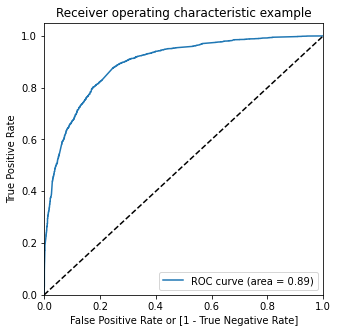

In [118]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cut off probability is that prob where we get balanced sensitivity and specificity

In [119]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.660539,2240,1,1,1,1,1,1,1,1,0,0,0
1,0,0.757429,113,1,1,1,1,1,1,1,1,1,0,0
2,1,0.817987,4132,1,1,1,1,1,1,1,1,1,1,0
3,0,0.102098,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.028740,1109,0,1,0,0,0,0,0,0,0,0,0


In [120]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.603323  0.977254  0.364697
0.2   0.2  0.769304  0.915110  0.676257
0.3   0.3  0.799209  0.881803  0.746501
0.4   0.4  0.814715  0.781478  0.835925
0.5   0.5  0.815665  0.713647  0.880767
0.6   0.6  0.809335  0.640536  0.917055
0.7   0.7  0.784968  0.525995  0.950233
0.8   0.8  0.766297  0.449228  0.968637
0.9   0.9  0.716772  0.291633  0.988077


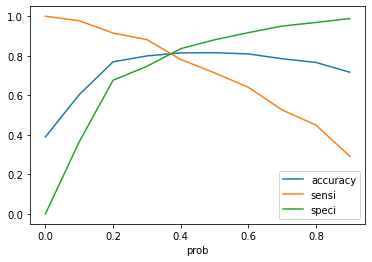

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [122]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.660539,2240,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.757429,113,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.817987,4132,1,1,1,1,1,1,1,1,1,1,0,1
3,0,0.102098,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.028740,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [124]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.660539,2240,1,1,1,1,1,1,1,1,0,0,0,1,66
1,0,0.757429,113,1,1,1,1,1,1,1,1,1,0,0,1,76
2,1,0.817987,4132,1,1,1,1,1,1,1,1,1,1,0,1,82
3,0,0.102098,5573,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.028740,1109,0,1,0,0,0,0,0,0,0,0,0,0,3
5,0,0.039272,2282,0,1,0,0,0,0,0,0,0,0,0,0,4
6,1,0.776290,2976,1,1,1,1,1,1,1,1,1,0,0,1,78
7,0,0.479994,8431,0,1,1,1,1,1,0,0,0,0,0,1,48
8,1,0.820202,2770,1,1,1,1,1,1,1,1,1,1,0,1,82
9,1,0.996406,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [125]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1985
0     477
Name: final_predicted, dtype: int64

In [129]:
# check the precentage of final_predicted conversions

round(100*(1985/float(1985+477)),2)

80.63

##### Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . and we are able to achive that with approximate conversion of 80.63%. Hence we can say that this is a good model.

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value  on final prediction on train set

In [130]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136075949367089

In [131]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3157,  701],
       [ 477, 1985]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.80625507717303

In [134]:
# Let us calculate specificity

TN / float(TN+FP)

0.8182996371176775

In [135]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.18170036288232244


In [136]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7390171258376769


In [137]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8687396807925152


##### Metrics - Precision and Recall

In [138]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3398,  460],
       [ 705, 1757]], dtype=int64)

In [142]:
from sklearn.metrics import precision_score, recall_score

# precision

precision_score = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('precision score is :', precision_score)

# recall

recall_score = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('recall score is :', recall_score)

precision score is : 0.7925124041497519
recall score is : 0.7136474411047928


### Precision and recall tradeoff

In [143]:
from sklearn.metrics import precision_recall_curve

In [144]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

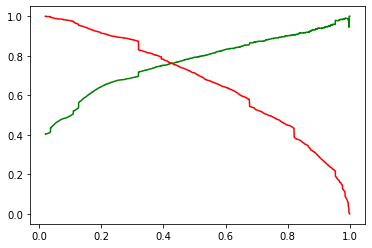

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [147]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Bounced,LastActivity_Not Sure,LastActivity_Olark Chat Conversation,CurrentOccupation_Housewife,CurrentOccupation_No Info,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0,0,0,0,0,0,0,0,0,0,1,0
8697,0,0.4375,0.184032,0,0,0,0,0,0,0,0,0,0,1,0
7378,0,0.1250,0.163284,0,0,0,0,0,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,0,0,0,0,0,0,0
4799,0,0.5000,0.744700,0,0,0,0,0,0,0,0,0,0,1,0


Making predictions on the test set

In [148]:
y_test_pred = result2.predict(X_test_sm)

In [149]:
y_test_pred[:10]

2296    0.906792
8697    0.609413
7378    0.172552
8631    0.447526
4799    0.955206
4503    0.393050
7129    0.940178
1717    0.127106
8398    0.904202
5116    0.319628
dtype: float64

In [150]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [151]:
y_pred_1.head()

,0
2296,0.906792
8697,0.609413
7378,0.172552
8631,0.447526
4799,0.955206


In [152]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [153]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [154]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [155]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [156]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.906792
1,0,8697,0.609413
2,0,7378,0.172552
3,0,8631,0.447526
4,1,4799,0.955206


In [157]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [159]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.906792
1,0,8697,0.609413
2,0,7378,0.172552
3,0,8631,0.447526
4,1,4799,0.955206


In [160]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [161]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,2296,0.906792,1
1,0,8697,0.609413,1
2,0,7378,0.172552,0
3,0,8631,0.447526,1
4,1,4799,0.955206,1


In [162]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.906792,1,91
1,0,8697,0.609413,1,61
2,0,7378,0.172552,0,17
3,0,8631,0.447526,1,45
4,1,4799,0.955206,1,96
5,0,4503,0.393050,1,39
6,0,7129,0.940178,1,94
7,0,1717,0.127106,0,13
8,0,8398,0.904202,1,90
9,1,5116,0.319628,0,32


In [163]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    811
0    204
Name: final_predicted, dtype: int64

In [164]:
# check the precentage of final_predicted conversions on test data:

round(100*(811/float(811+204)),2)

79.9

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity  on test set

In [165]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8121077888519749

In [166]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1389,  305],
       [ 204,  811]], dtype=int64)

In [167]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [168]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7990147783251231

In [169]:
# Let us calculate specificity
TN / float(TN+FP)

0.819952774498229

##### Precision and Recall metrics for the test set 

In [177]:
from sklearn.metrics import precision_score, recall_score

# precision

presicion_score_test = round(100*precision_score(y_pred_final.Converted, y_pred_final.final_predicted),2)
print('precision_score is :',presicion_score_test)

# recall

recall_score_test = round(100*recall_score(y_pred_final.Converted, y_pred_final.final_predicted),2)
print('recall score is :', recall_score_test)

precision_score is : 72.67
recall score is : 79.9


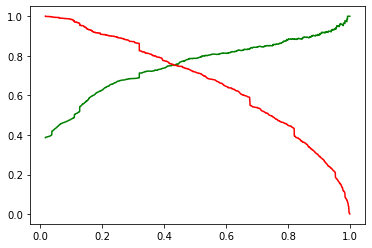

In [178]:

p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


Conclusion :
    
    - Accuracy, Sensitivity and Specificity values of test set are around 81%, 80% and 82% which are approximately closer to 
      the respective values calculated using trained set.
    - Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
      around 81%
    - Top 3 Features which contributes more towards the probability of a lead getting converted sre:
    1) Total Time Spent on Website
    2) LeadOrigin_Lead Add Form
    3) LastNotableActivity_Had a Phone Conversation
    - Hence overall this model seems to be good.   
